## MODELOS DE SERIES DE TIEMPO PARA DEMANDA DE GAS NATURAL EN SECTOR ELÉCTRICO EN MÉXICO 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sympy import true
from datetime import datetime, timedelta
register_matplotlib_converters()
from time import time 


Vamos a leer la data de Demanda en sector eléctrico

In [4]:
demanda_electrico_original = pd.read_excel(R'Demanda_electrico_2022_full1.xlsx')
demanda_electrico_original

,Date,Demanded_Gas
0,2005-01-01,1819.58
1,2005-02-01,1895.33
2,2005-03-01,1765.86
3,2005-04-01,1642.70
4,2005-05-01,1895.54
...,...,...
208,2022-05-01,3350.03
209,2022-06-01,3498.70
210,2022-07-01,3350.97
211,2022-08-01,3506.42


Vamos a graficar los datos "originales" de demanda eléctrico desde 2005 hasta 2022

Text(0, 0.5, 'Demanda [MMpcd]')

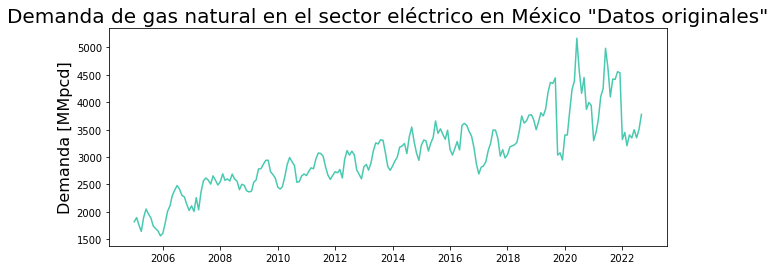

In [5]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_original['Date'], demanda_electrico_original['Demanded_Gas'], color='#48C9B0')
plt.title('Demanda de gas natural en el sector eléctrico en México "Datos originales"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Vamos a descomponer la serie de tiempo de datos "originales" de demanda eléctrico desde 2005 hasta 2022 en sus compoentes de Tendencia, Estacionalidad y Residual

In [6]:
demanda_electrico_original['Demanded_Gas']

0      1819.58
1      1895.33
2      1765.86
3      1642.70
4      1895.54
        ...   
208    3350.03
209    3498.70
210    3350.97
211    3506.42
212    3778.37
Name: Demanded_Gas, Length: 213, dtype: float64

The error "ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None" occurs when the seasonal_decompose function from the statsmodels.tsa.seasonal module is not able to determine the frequency of the time series data automatically
1
3
4
. To solve this error, you need to specify the frequency of the time series data explicitly by setting the period parameter in the seasonal_decompose function
1
3
4
. The period parameter specifies the number of data points in each seasonal cycle of the time series data. For example, if the time series data has a seasonal cycle of 12 months, the period parameter should be set to 12.

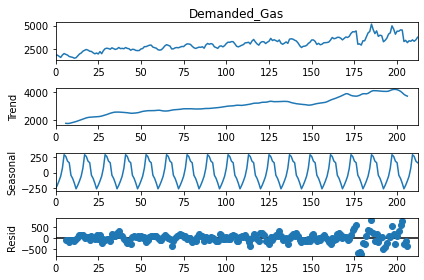

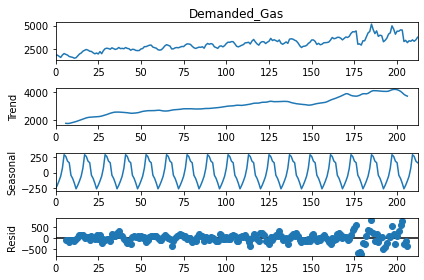

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

demanda_electrico_original_seasonal_decomposition = seasonal_decompose(demanda_electrico_original['Demanded_Gas'], period=12)
demanda_electrico_original_seasonal_decomposition.plot()

Se lleva a cabo el proceso de prueba estacionariedad de Dickey-Fulley a la Demanda de gas natural en el sector eléctrico en México "Datos originales"

In [8]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_test_electrico_original_sin_diferenciar = adfuller(demanda_electrico_original['Demanded_Gas'])


adf_test_electrico_original_sin_diferenciar

(-1.9362234591018295,
 0.3152169397511435,
 15,
 197,
 {'1%': -3.463987334463603,
  '5%': -2.8763259091636213,
  '10%': -2.5746515171738515},
 2667.963876967698)

Se observa que el valor de p NO es menor a 0.05 porlo que NO se rechaza H0 que establece que la serie NO es estacionaria

Se elaboran las gráficas de ACF y PACF de la Demanda de gas natural en el sector eléctrico en México con los "Datos originales"

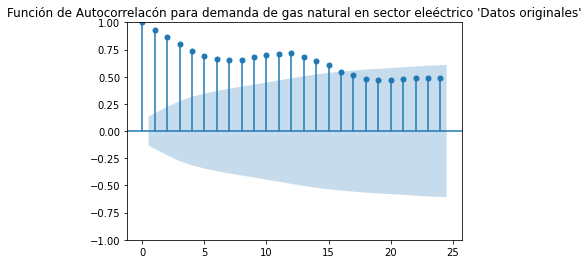

In [9]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_original['Demanded_Gas'].dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para demanda de gas natural en sector eleéctrico 'Datos originales'")

# Show the plot
plt.show()

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


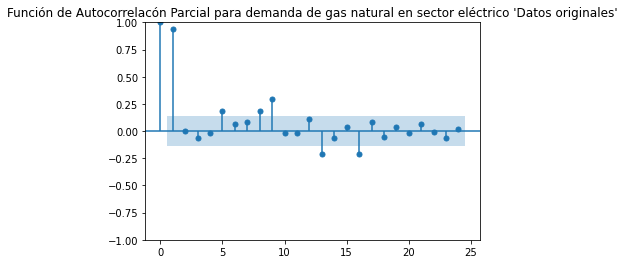

In [10]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_original['Demanded_Gas'].dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para demanda de gas natural en sector eléctrico 'Datos originales'")

# Show the plot
plt.show()

Se procede entonces a diferenciar la serie para lograr estacionariedad 

In [11]:
demanda_electrico_original_diff1 = demanda_electrico_original['Demanded_Gas'].diff()
demanda_electrico_original_diff1

0         NaN
1       75.75
2     -129.47
3     -123.16
4      252.84
        ...  
208    -53.41
209    148.67
210   -147.73
211    155.45
212    271.95
Name: Demanded_Gas, Length: 213, dtype: float64

Se grafica la diferencia de demanda en el sector eléctrico 

Text(0, 0.5, ' Diferencia Demanda [MMpcd]')

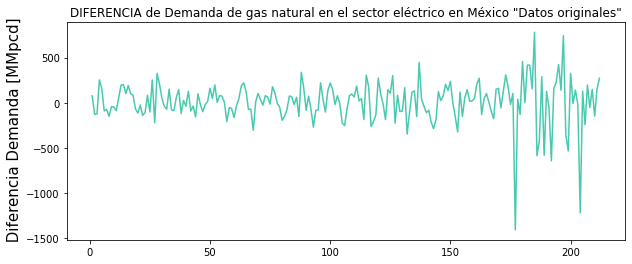

In [12]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_original_diff1, color='#48C9B0')
plt.title('DIFERENCIA de Demanda de gas natural en el sector eléctrico en México "Datos originales"')
plt.ylabel(' Diferencia Demanda [MMpcd]', fontsize =15)

Se lleva a cabo el proceso de prueba estacionariedad de Dickey-Fulley a la DIFERENCIA1 Demanda de gas natural en el sector eléctrico en México "Datos originales"

In [13]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Check for infinite or NaN values
demanda_electrico_original_diff1.dropna(inplace=True)

# Perform ADF test
adf_test_electrico_original_diferencia1 = adfuller(demanda_electrico_original_diff1)


adf_test_electrico_original_diferencia1

(-4.063276407512036,
 0.0011131147894365412,
 15,
 196,
 {'1%': -3.464161278384219,
  '5%': -2.876401960790147,
  '10%': -2.5746921001665974},
 2657.205881461088)

Se observa que el valor de p SI es menor a 0.05 porlo que SI se rechaza H0 que establece que la serie NO es estacionaria. 

Se elaboran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México

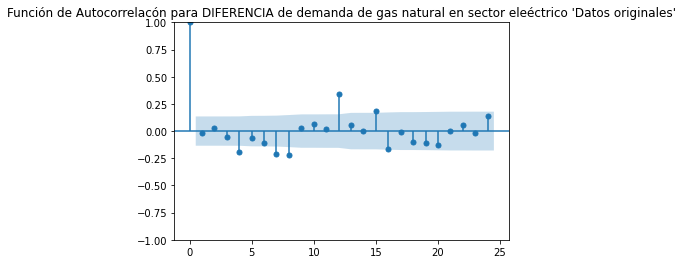

In [14]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_original_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para DIFERENCIA de demanda de gas natural en sector eleéctrico 'Datos originales'")

# Show the plot
plt.show()

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


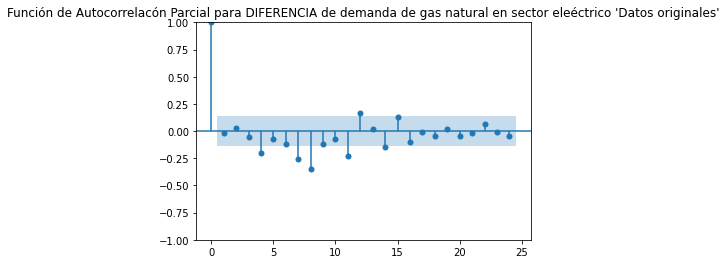

In [15]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_original_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para DIFERENCIA de demanda de gas natural en sector eleéctrico 'Datos originales'")

# Show the plot
plt.show()

Separamos la Demanda de gas natural en el sector eléctrico en data de train y test

In [16]:
demanda_electrico_original

,Date,Demanded_Gas
0,2005-01-01,1819.58
1,2005-02-01,1895.33
2,2005-03-01,1765.86
3,2005-04-01,1642.70
4,2005-05-01,1895.54
...,...,...
208,2022-05-01,3350.03
209,2022-06-01,3498.70
210,2022-07-01,3350.97
211,2022-08-01,3506.42


In [17]:
# Number of data points to keep for testing (in this case, the last 12)
num_test_points = 12

# Split the data into training and testing sets
demanda_electrico_original_train_data = demanda_electrico_original[:-num_test_points]
demanda_electrico_original_test_data = demanda_electrico_original[-num_test_points:]

demanda_electrico_original_train_data

,Date,Demanded_Gas
0,2005-01-01,1819.58
1,2005-02-01,1895.33
2,2005-03-01,1765.86
3,2005-04-01,1642.70
4,2005-05-01,1895.54
...,...,...
196,2021-05-01,4243.93
197,2021-06-01,4985.53
198,2021-07-01,4631.85
199,2021-08-01,4098.81


Se grafica la distribución de Demanda de gas natural en el sector eléctrico "Datos originales"

In [18]:
import pandas as pd
import numpy as np

# Load time series data into Pandas DataFrame
df_demanda_electrico_original_train_data = pd.DataFrame(demanda_electrico_original_train_data) 
df_demanda_electrico_original_train_data

,Date,Demanded_Gas
0,2005-01-01,1819.58
1,2005-02-01,1895.33
2,2005-03-01,1765.86
3,2005-04-01,1642.70
4,2005-05-01,1895.54
...,...,...
196,2021-05-01,4243.93
197,2021-06-01,4985.53
198,2021-07-01,4631.85
199,2021-08-01,4098.81


Se observa la distribución de probabilidad de la Demanda de gas natural en sector eléctrico "Datos originales" 

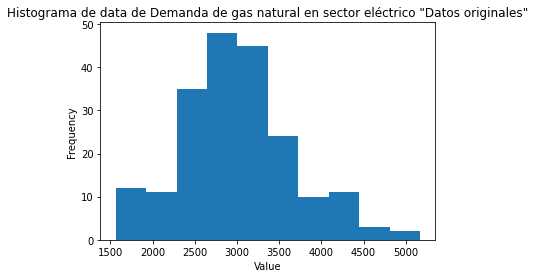

In [19]:
# Generate the histogram
plt.hist(df_demanda_electrico_original_train_data['Demanded_Gas'], bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico "Datos originales"')

# Display the plot
plt.show()

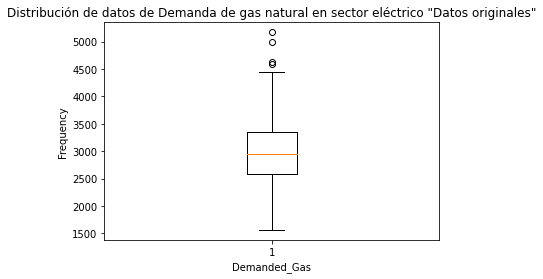

In [20]:
# Create a boxplot of the Demanded_Gas column
plt.boxplot(df_demanda_electrico_original_train_data['Demanded_Gas'])

# Add labels and title
plt.xlabel('Demanded_Gas')
plt.ylabel('Frequency')
plt.title('Distribución de datos de Demanda de gas natural en sector eléctrico "Datos originales"')

# Display the plot
plt.show()

Apliquemos un modelo ARIMA a nuestra data de Demanda de gas natural en sector eléctrico 'Datos originales'

In [21]:

##Create the model
model_ARIMA_electrico_original = ARIMA (demanda_electrico_original_train_data['Demanded_Gas'], order=(4,1,4))

##Fit the model
start = time()
model_ARIMA_electrico_original_fit = model_ARIMA_electrico_original.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_original_fit.summary())


c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model fitting time 2.1308183670043945
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1333.392
Date:                Wed, 13 Sep 2023   AIC                           2684.783
Time:                        17:56:19   BIC                           2714.468
Sample:                             0   HQIC                          2696.796
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8308      0.074     11.229      0.000       0.686       0.976
ar.L2         -0.4263      0.067     -6.332      0.000      -0.558      -0.294
ar.L3         

Hagamos predicciones con el modelo ARIMA para la Demanda de gas natural en sector eleéctrico 'Datos originales'

In [22]:
##get prediction start and end dates 
pred_model_ARIMA_electrico_start_date = demanda_electrico_original_test_data.index[0]
pred_model_ARIMA_electrico_end_date = demanda_electrico_original_test_data.index[-1]

##get the predictors and residuals 
predictions_model_ARIMA_electrico_original = model_ARIMA_electrico_original_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_original)

201    4116.760353
202    3938.306019
203    4073.956534
204    3890.889753
205    3786.363557
206    4046.456309
207    4033.246030
208    3975.558960
209    4247.672609
210    4266.689838
211    4127.559924
212    4289.069773
Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

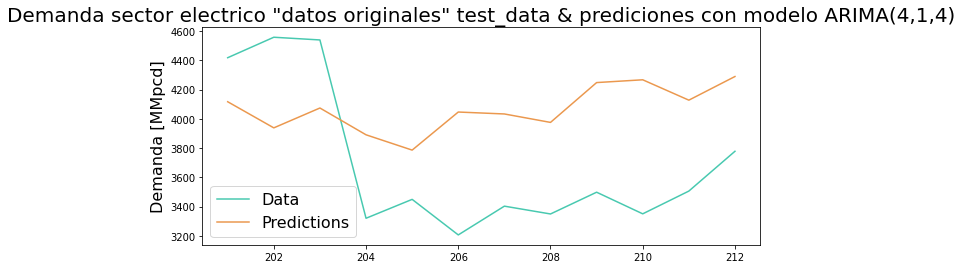

In [23]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'], color='#48C9B0')
plt.plot(predictions_model_ARIMA_electrico_original, color='#EB984E')
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico "datos originales" test_data & prediciones con modelo ARIMA(4,1,4)', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Cuantificando el error de las predicciones con el modelo ARIMA para la Demanda de gas natural en sector eleéctrico 'Datos originales'

In [86]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_ARIMA_electrico_original = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_original)
RMSE_predictions_model_ARIMA_electrico_original = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_original))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_original)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_original)

MAPE: 0.16739974297359148
RMSE: 623.6320827738078


### b1.) Proceso de AJUSTE de outliers para mejora de modelos ARIMA 

Se define la función que ayudará a la sustitución de outliers por la media aritetica del valor y a lo largo del tiempo

In [25]:
outlier_threshold = 1.35

import pandas as pd

def remove_replace_outliers(data):
    # Calculate Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers_mask = (data < (Q1 - outlier_threshold * IQR)) | (data > (Q3 + outlier_threshold * IQR))

    # Calculate the historical mean excluding outliers
    historical_mean = data[~outliers_mask].mean()

    # Replace outliers with historical mean
    data.loc[outliers_mask] = historical_mean

    return data

In [26]:

demanda_electrico_tratamiento1_train_data = remove_replace_outliers(demanda_electrico_original_train_data['Demanded_Gas'])
demanda_electrico_tratamiento1_train_data

C:\Users\Sergio\AppData\Local\Temp\ipykernel_13768\4273692593.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[outliers_mask] = historical_mean


0      1819.580000
1      1895.330000
2      1765.860000
3      1642.700000
4      1895.540000
          ...     
196    4243.930000
197    2938.789381
198    2938.789381
199    4098.810000
200    2938.789381
Name: Demanded_Gas, Length: 201, dtype: float64

Se grafica de los datos de entrenamiento de la Demanda de Gas Natural en sector eléctrico sin valores atípicos (tras haber aplicado la función remove_replace_outliers)


Text(0, 0.5, 'Demanda [MMpcd]')

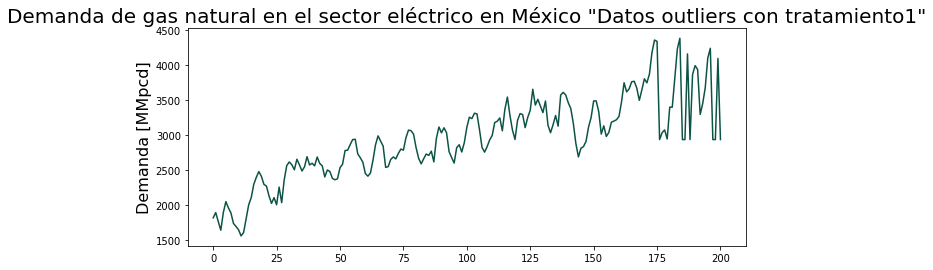

In [27]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_tratamiento1_train_data, color='#0B5345')
plt.title('Demanda de gas natural en el sector eléctrico en México "Datos outliers con tratamiento1"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Se grafica la distribución de Demanda de gas natural en el sector eléctrico "Datos outliers con tratamiento1"

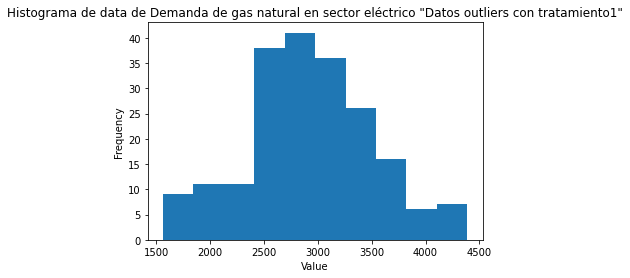

In [28]:
# Generate the histogram
plt.hist(demanda_electrico_tratamiento1_train_data, bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico "Datos outliers con tratamiento1"')

# Display the plot
plt.show()

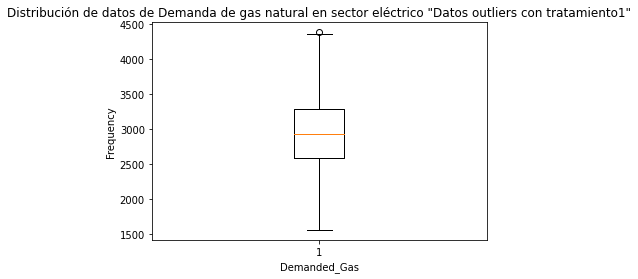

In [29]:
# Create a boxplot of the Demanded_Gas column
plt.boxplot(demanda_electrico_tratamiento1_train_data)

# Add labels and title
plt.xlabel('Demanded_Gas')
plt.ylabel('Frequency')
plt.title('Distribución de datos de Demanda de gas natural en sector eléctrico "Datos outliers con tratamiento1"')

# Display the plot
plt.show()

Se muestran las gráficas de ACF y PACF de la Demanda de gas natural en el sector eléctrico en México con los "Datos outliers con tratamiento1"

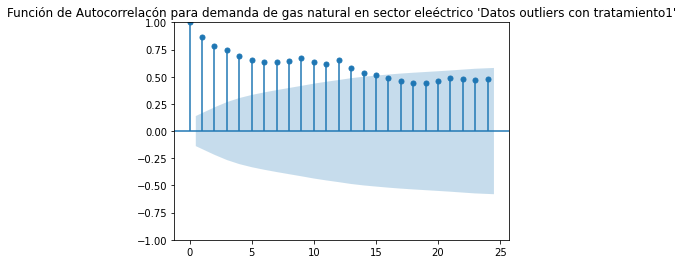

In [30]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_tratamiento1_train_data.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para demanda de gas natural en sector eleéctrico 'Datos outliers con tratamiento1'")

# Show the plot
plt.show()

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


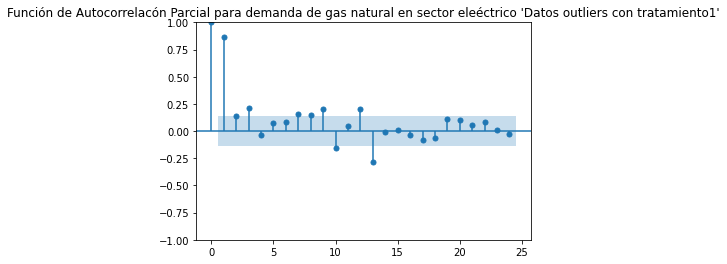

In [31]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_tratamiento1_train_data.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para demanda de gas natural en sector eleéctrico 'Datos outliers con tratamiento1'")

# Show the plot
plt.show()

También para este caso  se muestran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México


In [32]:
demanda_electrico_tratamiento1_diff1 = demanda_electrico_tratamiento1_train_data.diff()
demanda_electrico_tratamiento1_diff1

0              NaN
1        75.750000
2      -129.470000
3      -123.160000
4       252.840000
          ...     
196     139.110000
197   -1305.140619
198       0.000000
199    1160.020619
200   -1160.020619
Name: Demanded_Gas, Length: 201, dtype: float64

Text(0, 0.5, 'Demanda [MMpcd]')

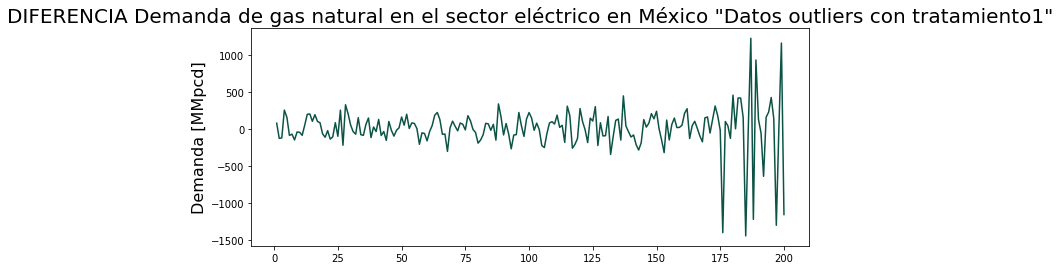

In [33]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_tratamiento1_diff1, color='#0B5345')
plt.title('DIFERENCIA Demanda de gas natural en el sector eléctrico en México "Datos outliers con tratamiento1"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Se muestran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México con los "Datos outliers con tratamiento1"

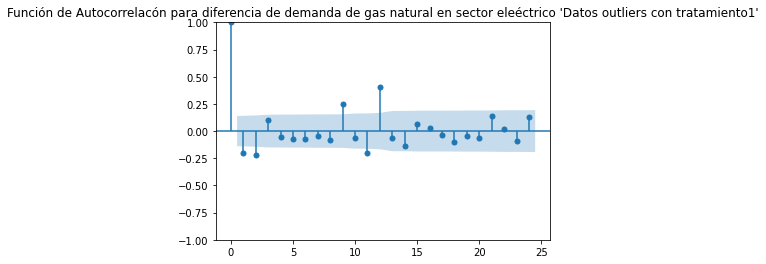

In [34]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_tratamiento1_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para diferencia de demanda de gas natural en sector eleéctrico 'Datos outliers con tratamiento1'")

# Show the plot
plt.show()

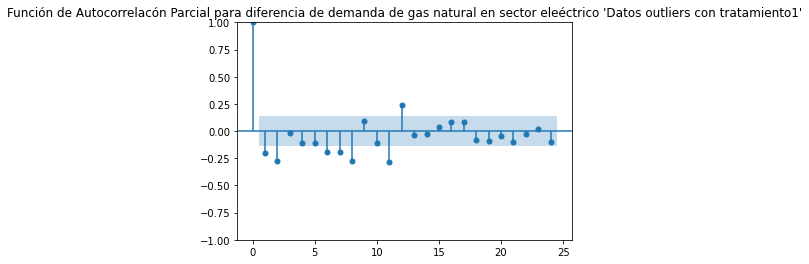

In [35]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_tratamiento1_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para diferencia de demanda de gas natural en sector eleéctrico 'Datos outliers con tratamiento1'")

# Show the plot
plt.show()

Apliquemos un modelo ARIMA a nuestra data de Demanda de gas natural en sector eléctrico 'Datos outliers con tratamiento1'

In [36]:
##Create the model
model_ARIMA_electrico_tratamiento1 = ARIMA (demanda_electrico_tratamiento1_train_data, order=(4,1,4))

##Fit the model
start = time()
model_ARIMA_electrico_tratamiento1_fit = model_ARIMA_electrico_tratamiento1.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_tratamiento1_fit.summary())


c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Model fitting time 0.6851067543029785
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1395.939
Date:                Wed, 13 Sep 2023   AIC                           2809.877
Time:                        17:56:26   BIC                           2839.562
Sample:                             0   HQIC                          2821.890
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0632      0.134      0.472      0.637      -0.199       0.326
ar.L2          0.4137      0.097      4.266      0.000       0.224       0.604
ar.L3         

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
##get the predictors and residuals 
predictions_model_ARIMA_electrico_tratamiento1 = model_ARIMA_electrico_tratamiento1_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_tratamiento1)

201    3068.512595
202    3357.916218
203    3551.654594
204    3409.038395
205    3585.862013
206    3523.712709
207    3432.644110
208    3558.930077
209    3420.576833
210    3439.778901
211    3491.890222
212    3373.521189
Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

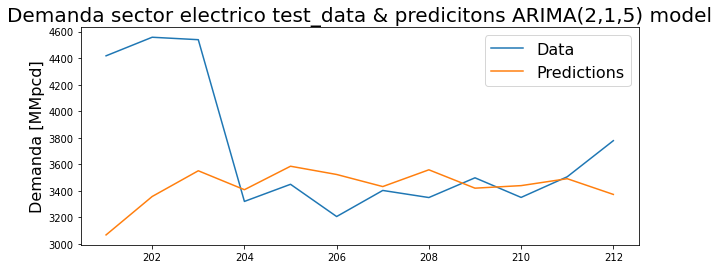

In [38]:

##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'])
plt.plot(predictions_model_ARIMA_electrico_tratamiento1)
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(2,1,5) model', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_ARIMA_electrico_tratamiento1

In [85]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_ARIMA_electrico_tratamiento1 = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_tratamiento1)
RMSE_predictions_model_ARIMA_electrico_tratamiento1 = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_tratamiento1))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_tratamiento1)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_tratamiento1)

MAPE: 0.09849416715773185
RMSE: 617.9488362332221


Vamos a entrenar un segundo modelo 

In [40]:
##Create the model
model_ARIMA_electrico_tratamiento1_v2 = ARIMA (demanda_electrico_tratamiento1_train_data, order=(5,1,2))

##Fit the model
start = time()
model_ARIMA_electrico_tratamiento1_v2_fit = model_ARIMA_electrico_tratamiento1_v2.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_tratamiento1_v2_fit.summary())


c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model fitting time 0.5308079719543457
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -1393.526
Date:                Wed, 13 Sep 2023   AIC                           2803.052
Time:                        17:56:27   BIC                           2829.438
Sample:                             0   HQIC                          2813.730
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2966      0.083     15.530      0.000       1.133       1.460
ar.L2         -0.6812      0.102     -6.675      0.000      -0.881      -0.481
ar.L3         

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
##get the predictors and residuals 
predictions_model_ARIMA_electrico_tratamiento1_v2 = model_ARIMA_electrico_tratamiento1_v2_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_tratamiento1_v2)

201    2937.876535
202    3390.511890
203    3373.779111
204    3317.893534
205    3424.165704
206    3464.627609
207    3412.157584
208    3358.177431
209    3305.377674
210    3244.090035
211    3201.231793
212    3193.799600
Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

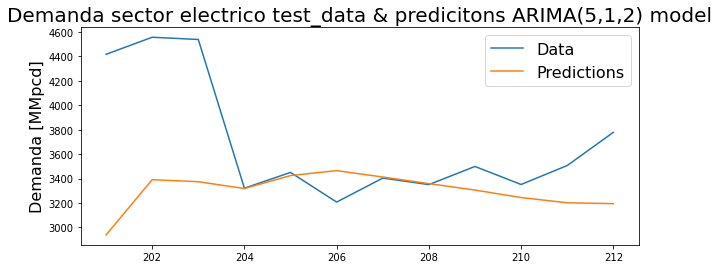

In [42]:

##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'])
plt.plot(predictions_model_ARIMA_electrico_tratamiento1_v2)
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(5,1,2) model', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_ARIMA_electrico_tratamiento1_v2

In [83]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_ARIMA_electrico_tratamiento1_v2 = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_tratamiento1_v2)
RMSE_predictions_model_ARIMA_electrico_tratamiento1_v2 = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_tratamiento1_v2))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_tratamiento1_v2)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_tratamiento1_v2)

MAPE: 0.105850984467754
RMSE: 674.4870014548683


### b2.) Proceso de REMOCION de outliers para mejora de modelos ARIMA 

In [44]:
demanda_electrico_original_train_data

,Date,Demanded_Gas
0,2005-01-01,1819.580000
1,2005-02-01,1895.330000
2,2005-03-01,1765.860000
3,2005-04-01,1642.700000
4,2005-05-01,1895.540000
...,...,...
196,2021-05-01,4243.930000
197,2021-06-01,2938.789381
198,2021-07-01,2938.789381
199,2021-08-01,4098.810000


In [45]:
demanda_electrico_train_data_recortada = demanda_electrico_original_train_data[0:182]
demanda_electrico_train_data_recortada

,Date,Demanded_Gas
0,2005-01-01,1819.58
1,2005-02-01,1895.33
2,2005-03-01,1765.86
3,2005-04-01,1642.70
4,2005-05-01,1895.54
...,...,...
177,2019-10-01,3037.44
178,2019-11-01,3076.62
179,2019-12-01,2947.09
180,2020-01-01,3402.47


A continuación se muestra la gráfica de los datos de entrenamiento sin valores atípicos (tras haber removido los datos de 2020 y 2021)

Text(0, 0.5, 'Demanda [MMpcd]')

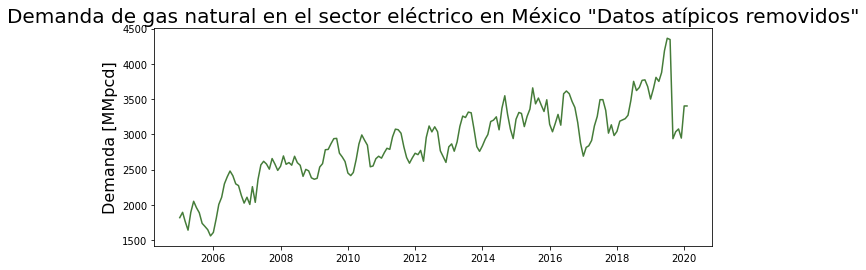

In [46]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_train_data_recortada['Date'], demanda_electrico_train_data_recortada['Demanded_Gas'], color='#457C39')
plt.title('Demanda de gas natural en el sector eléctrico en México "Datos atípicos removidos"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Se observa la distribución de probabilidad de la Demanda de gas natural en sector eléctrico "Datos recortados"

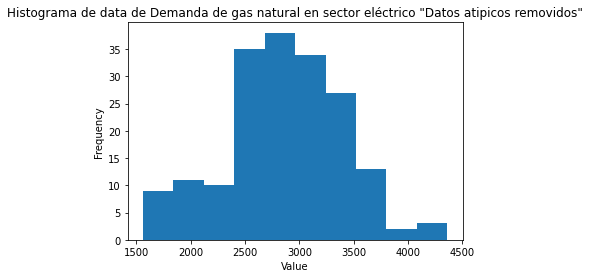

In [47]:
# Generate the histogram
plt.hist(demanda_electrico_train_data_recortada['Demanded_Gas'], bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico "Datos atipicos removidos"')

# Display the plot
plt.show()

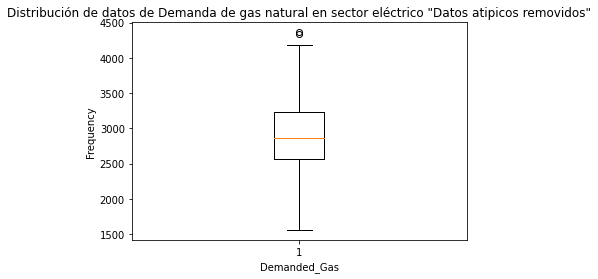

In [48]:
# Create a boxplot of the Demanded_Gas column
plt.boxplot(demanda_electrico_train_data_recortada['Demanded_Gas'])

# Add labels and title
plt.xlabel('Demanded_Gas')
plt.ylabel('Frequency')
plt.title('Distribución de datos de Demanda de gas natural en sector eléctrico "Datos atipicos removidos"')

# Display the plot
plt.show()

Se muestran las gráficas de ACF y PACF de la Demanda de gas natural en el sector eléctrico en México con los "Datos atípicos removidos"

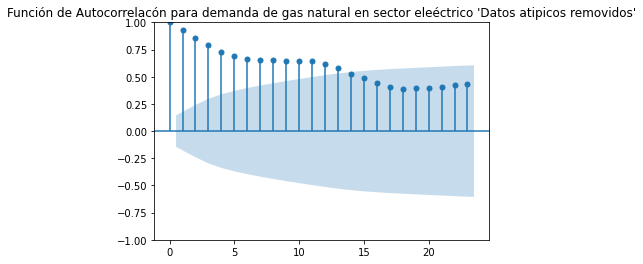

In [49]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_train_data_recortada['Demanded_Gas'].dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para demanda de gas natural en sector eleéctrico 'Datos atipicos removidos'")

# Show the plot
plt.show()

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


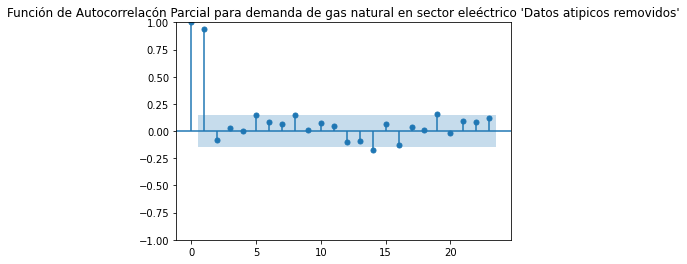

In [50]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_train_data_recortada['Demanded_Gas'].dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para demanda de gas natural en sector eleéctrico 'Datos atipicos removidos'")

# Show the plot
plt.show()

También para este caso se muestran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México con datos atípicos removidos

In [51]:
demanda_electrico_removidos_diff1 = demanda_electrico_train_data_recortada['Demanded_Gas'].diff()
demanda_electrico_removidos_diff1

0             NaN
1       75.750000
2     -129.470000
3     -123.160000
4      252.840000
          ...    
177     98.650619
178     39.180000
179   -129.530000
180    455.380000
181      0.000000
Name: Demanded_Gas, Length: 182, dtype: float64

Text(0, 0.5, 'Demanda [MMpcd]')

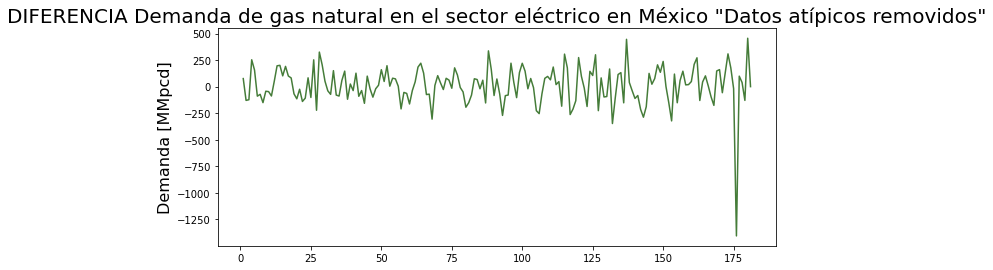

In [52]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_removidos_diff1, color='#457C39')
plt.title('DIFERENCIA Demanda de gas natural en el sector eléctrico en México "Datos atípicos removidos"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Se muestran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México con con datos atípicos removidos

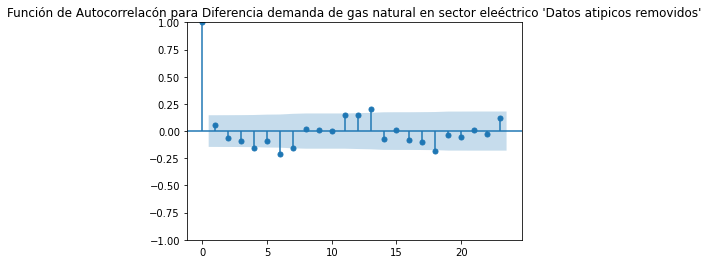

In [53]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_removidos_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para Diferencia demanda de gas natural en sector eleéctrico 'Datos atipicos removidos'")

# Show the plot
plt.show()

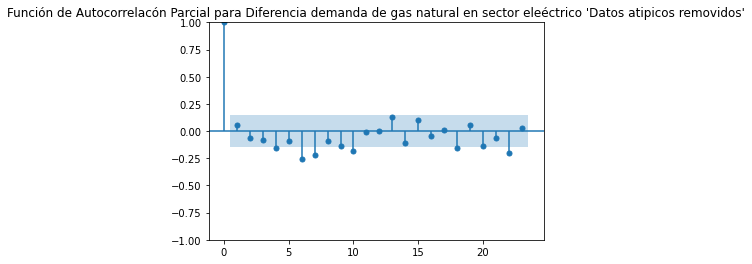

In [54]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_removidos_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para Diferencia demanda de gas natural en sector eleéctrico 'Datos atipicos removidos'")

# Show the plot
plt.show()

Aplicamos un modelo ARIMA a nuestra data de Demanda de gas natural en sector eléctrico 'Datos atípicos removidos'

In [55]:
##Create the model
model_ARIMA_electrico_removidos = ARIMA (demanda_electrico_train_data_recortada['Demanded_Gas'], order=(4,1,4))

##Fit the model
start = time()
model_ARIMA_electrico_removidos_fit = model_ARIMA_electrico_removidos.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_removidos_fit.summary())

Model fitting time 0.6828577518463135
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  182
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1182.428
Date:                Wed, 13 Sep 2023   AIC                           2382.857
Time:                        17:56:32   BIC                           2411.643
Sample:                             0   HQIC                          2394.527
                                - 182                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2047      0.157      7.683      0.000       0.897       1.512
ar.L2         -1.0253      0.158     -6.493      0.000      -1.335      -0.716
ar.L3         

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [56]:
##get the predictors and residuals 
predictions_model_ARIMA_electrico_removidos = model_ARIMA_electrico_removidos_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_removidos)

201    3419.844095
202    3383.629539
203    3369.521979
204    3369.015697
205    3366.890340
206    3375.955034
207    3398.788503
208    3415.066097
209    3422.638437
210    3433.213533
211    3439.188918
212    3431.887313
Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

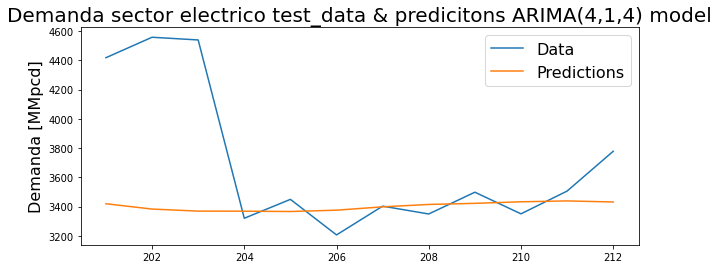

In [52]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'])
plt.plot(predictions_model_ARIMA_electrico_removidos)
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(4,1,4) model', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_ARIMA_electrico_removidos

In [82]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np
# Compute errors
MAPE_predictions_model_ARIMA_electrico_removidos = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_removidos)
RMSE_predictions_model_ARIMA_electrico_removidos = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_removidos))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_removidos)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_removidos)

MAPE: 0.08418546197427819
RMSE: 571.5137716393795


### C.) Proceso de normalización de data como tratamiento para valores atípicos

In [57]:
demanda_electrico_original_train_data

,Date,Demanded_Gas
0,2005-01-01,1819.580000
1,2005-02-01,1895.330000
2,2005-03-01,1765.860000
3,2005-04-01,1642.700000
4,2005-05-01,1895.540000
...,...,...
196,2021-05-01,4243.930000
197,2021-06-01,2938.789381
198,2021-07-01,2938.789381
199,2021-08-01,4098.810000


In [58]:
demanda_electrico_original_test_data

,Date,Demanded_Gas
201,2021-10-01,4417.51
202,2021-11-01,4557.36
203,2021-12-01,4538.89
204,2022-01-01,3320.75
205,2022-02-01,3449.80
206,2022-03-01,3206.96
207,2022-04-01,3403.44
208,2022-05-01,3350.03
209,2022-06-01,3498.70
210,2022-07-01,3350.97


Vamos a entrenar el miMax escaler 

In [65]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Create a MinMaxScaler object and fit it to the training data
MinMax_scaler = MinMaxScaler()
MinMax_scaler.fit(demanda_electrico_original_train_data['Demanded_Gas'].values.reshape(-1, 1))


MinMaxScaler()

In [68]:

# Transform both the training and test data using the trained scaler
demanda_electrico_scaled_train_data = MinMax_scaler.transform(demanda_electrico_original_train_data['Demanded_Gas'].values.reshape(-1, 1))
demanda_electrico_scaled_train_data


array([[0.09147733],
       [0.11827318],
       [0.07247438],
       [0.02890768],
       [0.11834747],
       [0.17359468],
       [0.14187475],
       [0.11626747],
       [0.06300828],
       [0.04773376],
       [0.03111856],
       [0.        ],
       [0.01749955],
       [0.08679026],
       [0.15773295],
       [0.19361286],
       [0.26103229],
       [0.29639927],
       [0.32531403],
       [0.30142239],
       [0.26088725],
       [0.25219231],
       [0.20284549],
       [0.16448939],
       [0.19380388],
       [0.15770819],
       [0.24692511],
       [0.16825319],
       [0.2832755 ],
       [0.35594797],
       [0.37406303],
       [0.36023885],
       [0.33458558],
       [0.3877917 ],
       [0.35975068],
       [0.32841634],
       [0.34926581],
       [0.40093317],
       [0.35895123],
       [0.36763556],
       [0.35442335],
       [0.39923875],
       [0.36703774],
       [0.35405546],
       [0.29850757],
       [0.33350667],
       [0.32613117],
       [0.291

In [69]:
##Create the model
model_ARIMA_electrico_normalize = ARIMA (demanda_electrico_scaled_train_data, order=(4,1,4))

##Fit the model
start = time()
model_ARIMA_electrico_normalize_fit = model_ARIMA_electrico_normalize.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_normalize_fit.summary())

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Model fitting time 0.6867258548736572
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  201
Model:                 ARIMA(4, 1, 4)   Log Likelihood                 202.200
Date:                Wed, 13 Sep 2023   AIC                           -386.400
Time:                        18:07:17   BIC                           -356.715
Sample:                             0   HQIC                          -374.387
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3637      0.133      2.739      0.006       0.103       0.624
ar.L2         -0.0493      0.099     -0.500      0.617      -0.243       0.144
ar.L3         

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [70]:
##get the predictors and residuals 
predictions_model_ARIMA_electrico_normalize = model_ARIMA_electrico_normalize_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_normalize)

[0.53122063 0.75595601 0.6402629  0.63397549 0.80042611 0.65045811
 0.64187543 0.78678403 0.63070571 0.6366548  0.77054453 0.61575081]


In [78]:
predictions_model_ARIMA_electrico_normalize_original_rescale = MinMax_scaler.inverse_transform(predictions_model_ARIMA_electrico_normalize.reshape(-1, 1))
predictions_model_ARIMA_electrico_normalize_original_rescale

array([[3062.70354785],
       [3698.01472917],
       [3370.9583964 ],
       [3353.18432339],
       [3823.72858001],
       [3399.77953297],
       [3375.51690648],
       [3785.16336764],
       [3343.94090637],
       [3360.75854747],
       [3739.25543774],
       [3301.66444434]])

In [77]:
demanda_electrico_original_test_data['Demanded_Gas'].values

array([4417.51, 4557.36, 4538.89, 3320.75, 3449.8 , 3206.96, 3403.44,
       3350.03, 3498.7 , 3350.97, 3506.42, 3778.37])

Text(0, 0.5, 'Demanda [MMpcd]')

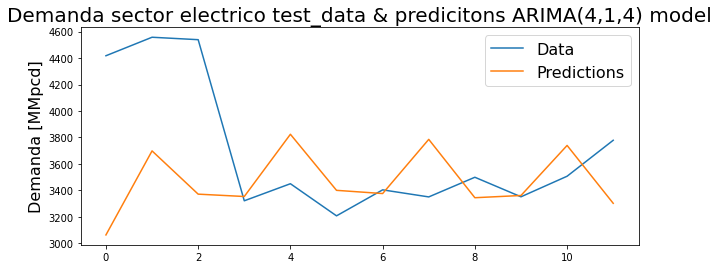

In [79]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'].values)
plt.plot(predictions_model_ARIMA_electrico_normalize_original_rescale)
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(4,1,4) model', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_ARIMA_electrico_normalize_original_rescale

In [81]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np
# Compute errors
MAPE_predictions_model_ARIMA_electrico_normalize_original_rescale = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_normalize_original_rescale)
RMSE_predictions_model_ARIMA_electrico_normalize_original_rescale = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_normalize_original_rescale))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_normalize_original_rescale)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_normalize_original_rescale)

MAPE: 0.10905586515230918
RMSE: 619.9274457496965
